### Everything about Filtering

Main goal is to understand : In the common CNN Architecture, what is it learning ? And how do we visualize the same ? 

Features are combination of uninformative pixels which represent something. So we can extract those features and use them for our training purpose under the assumption that they contain the high level information we need $\to$ refer to the feature extraction section of the FPCV. 

Edges : Sudden changes in the image $\to$ Edge is a place of rapid change in image intensity function

In [2]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
import cv2

os.getcwd()

'/Users/krishuagarwal/Desktop/Programming/python/d2l-learnings/notebook/ComputerVision'

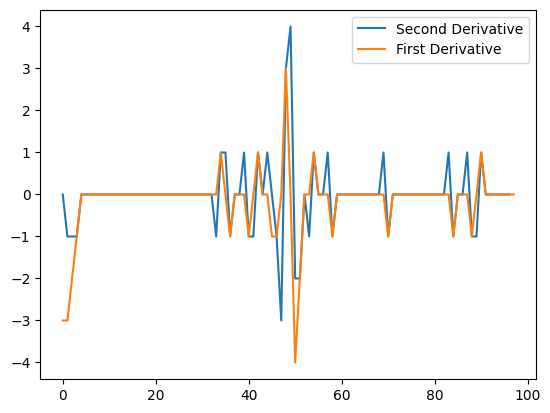

In [3]:
image = Image.open('edge-image.jpg')
gray_image = image.convert('L')
img_array = np.array(gray_image)

intensity = img_array.reshape(-1,1)
sub_intensity = intensity[1:100]

conv_filter = np.array([-1, 1])
dof = np.convolve(sub_intensity.flatten(), conv_filter, mode='valid')
ddof = np.convolve(dof, conv_filter, mode='valid')

plt.plot(ddof, label='Second Derivative')
plt.plot(dof, label='First Derivative')
plt.legend()
plt.show()

In the plot we can we can see that where there are sharp extremums we are able to detect an edge there, really interesting and we find these extremums using the approximation of the gradient. Zero crossing is there in the second derivative confirming the edge

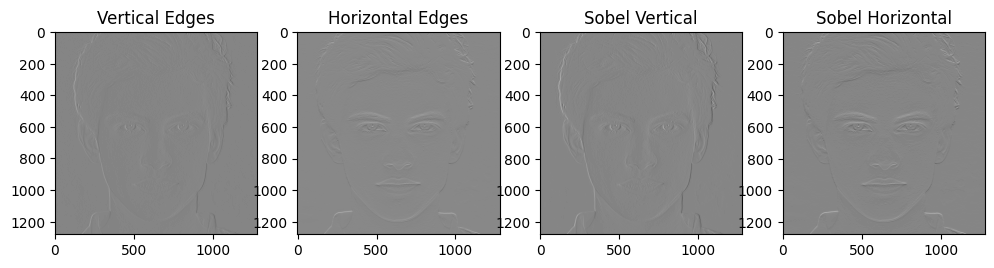

In [4]:
vertical_edges = np.array([[-1, 1]])
horizontal_edges = np.array([[-1], [1]])
vert = convolve2d(img_array, vertical_edges, mode='valid')
hor = convolve2d(img_array, horizontal_edges, mode='valid')

sobel = np.array([[-1, 0, 1],
              [-2, 0, 2],
              [-1, 0, 1]])

sobel_vert = convolve2d(img_array, sobel, mode='valid')
sobel_hor = convolve2d(img_array, sobel.T, mode='valid')

fig, ax = plt.subplots(1, 4, figsize=(12, 6))
ax[0].set_title('Vertical Edges')
ax[1].set_title('Horizontal Edges')
ax[2].set_title('Sobel Vertical')
ax[3].set_title('Sobel Horizontal')
ax[0].imshow(vert, cmap='gray')
ax[1].imshow(hor, cmap='gray')
ax[2].imshow(sobel_vert, cmap='gray')
ax[3].imshow(sobel_hor, cmap='gray')
plt.show()


If you have noisy functions / image intensity then the differentiation of that noise is going to cost you a lot because. Now you will have a lot of pertubations and the edge will be lost. $\to$ we use loss pass or high pass filters. 

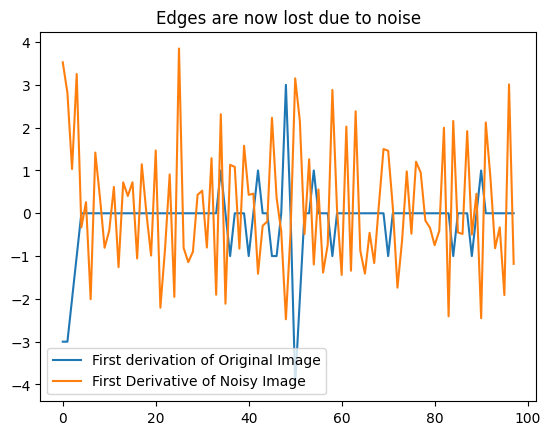

In [5]:
# More efficient approach
noise = np.random.normal(0, 1, img_array.shape)
img_noisy = img_array + noise

# Direct flattening and slicing
sub_intensity_noisy = img_noisy.flatten()[1:100]
dof_noisy = np.diff(sub_intensity_noisy, n=1)

plt.plot(dof, label='First derivation of Original Image')
plt.plot(dof_noisy, label='First Derivative of Noisy Image')
plt.legend()
plt.title('Edges are now lost due to noise')
plt.show()

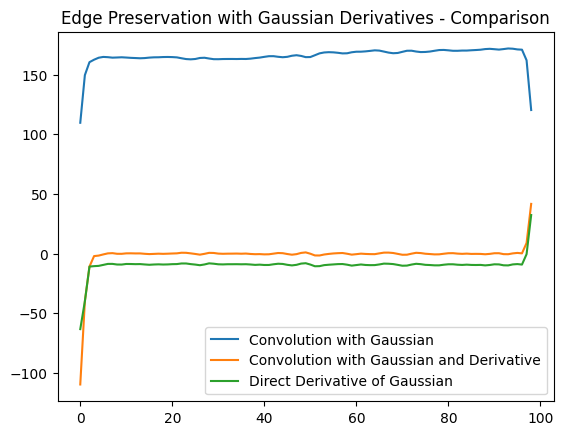

In [6]:

def create_gaussian_filter_1d(size, sigma):
    x = np.arange(size) - size // 2
    gaussian = np.exp(-0.5 * (x / sigma) ** 2)
    gaussian = gaussian / np.sum(gaussian)
    return gaussian

# Illustrating the derivative theorem of convolution
gaussian = create_gaussian_filter_1d(5, 1)
derivative = np.array([-1, 1])
dog = np.convolve(gaussian, derivative, mode='same') # Derivative of gaussian filter

# Comparing Convolutions
noisy_conv = np.convolve(sub_intensity_noisy, gaussian, mode='same')
noisy_conv_final = np.convolve(noisy_conv, derivative, mode='same')
dog_conv = np.convolve(sub_intensity_noisy, dog, mode='same') # Hence proved for seperable filters

plt.plot(noisy_conv, label='Convolution with Gaussian')
plt.plot(noisy_conv_final, label='Convolution with Gaussian and Derivative')
plt.plot(dog_conv, label='Direct Derivative of Gaussian')
plt.title('Edge Preservation with Gaussian Derivatives - Comparison')
plt.legend()
plt.show()

As the smoothing increases we see that minor edges also go down and only the main edge is being preserved, so if we do more smoothing then it will be a problem because we are going to miss the details in the edges and less smoothing then noise won't go away. 

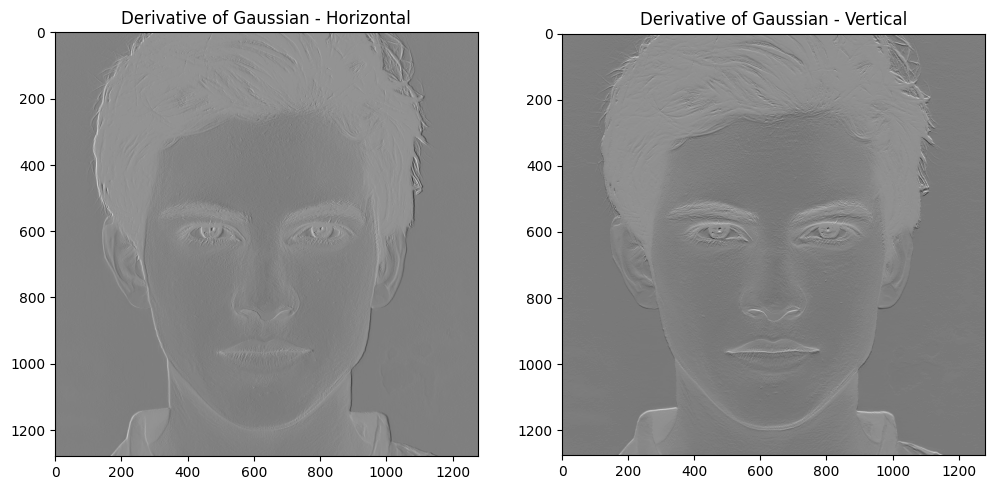

In [7]:
dog_noi = np.array([[-0.05448868, -0.18971266, -0.1584186 ,  0.1584186 ,  0.18971266]])
horizontal_edges = convolve2d(img_array, dog_noi, mode='valid')
vertical_edges = convolve2d(img_array, dog_noi.T, mode='valid')

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].set_title('Derivative of Gaussian - Horizontal')
ax[1].set_title('Derivative of Gaussian - Vertical')
ax[0].imshow(horizontal_edges, cmap='gray')
ax[1].imshow(vertical_edges, cmap='gray')
plt.show()

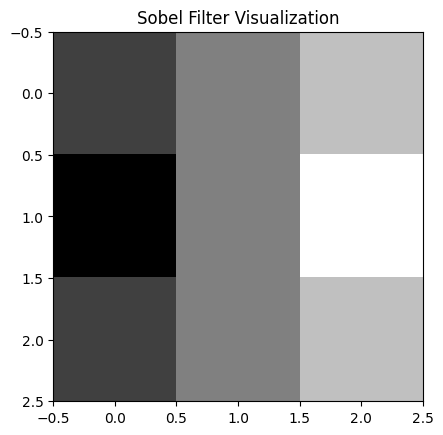

In [8]:
plt.imshow(sobel, cmap='gray')
plt.title('Sobel Filter Visualization')
plt.show()


### Frequency Domain

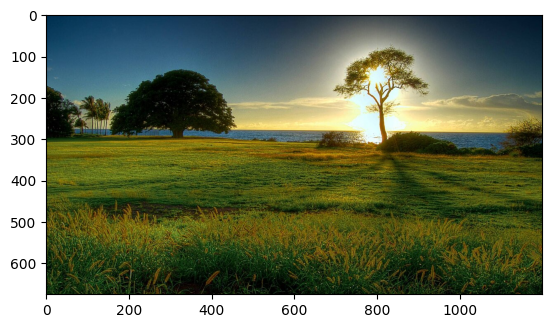

In [22]:
nature = Image.open('natural.jpg')
nature_2 = Image.open('natural-2.jpg')

nature_array = np.array(nature)
nature_array_2 = np.array(nature_2)

plt.imshow(nature)
plt.show()

The slides mention that natural image spectral follow as $\frac{1}{f^{\alpha}}$ power law. We are going to check this, because if that is true then it will make scene classification easier. 

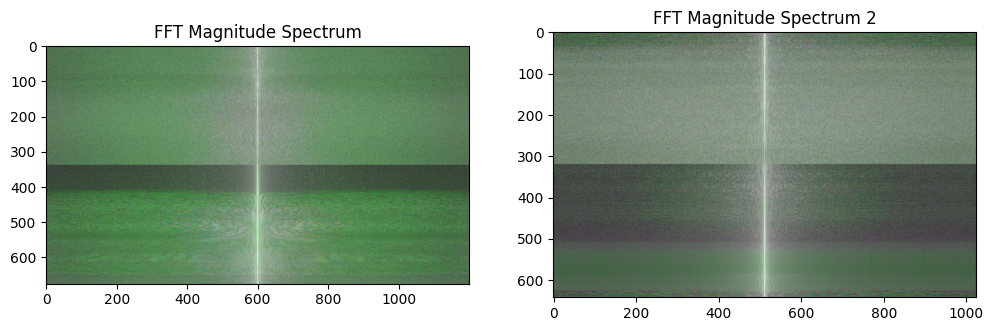

In [ ]:
## FFT
fft_nature = np.fft.fft2(nature_array)
fft_shifted = np.fft.fftshift(fft_nature)
magnitude_spectrum = np.log1p(np.abs(fft_shifted))  # log1p avoids log(0)

fft_nature_2 = np.fft.fft2(nature_array_2)
fft_shifted_2 = np.fft.fftshift(fft_nature_2)
magnitude_spectrum_2 = np.log1p(np.abs(fft_shifted_2))  # log1p avoids log(0)

visualization = magnitude_spectrum / np.max(magnitude_spectrum)
visualization_2 = magnitude_spectrum_2 / np.max(magnitude_spectrum_2)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(visualization, cmap='cool')
plt.title("FFT Magnitude Spectrum")
plt.subplot(1, 2, 2)
plt.imshow(visualization_2, cmap='cool')
plt.title("FFT Magnitude Spectrum 2")
plt.show()


This cannot be a coincidece that the magnitude spectrum of two nature pictures are similar. 